**Assignment 1 – End-to-end Machine Learning project**

Data Science Lifecycle

# Step 1: Problem Formulation

The diamond industry is growing ~5% year on year, and the expertise required to define accurate prices has been limited to a few gemologists, making the process prone to discrepancies and inefficiencies. To maintain fair commerce and buyer trust, there needs to be a system that can accurately determine the price of a diamond based on various elements, including physical traits and quality parameters such as carat, cut, color, clarity, and dimensions (length, width, and depth).





**Objective:** To create a ML model that uses a diamond's carat, cut, color, clarity, and dimensions (length, width, and depth) to predict its price.

# Step 2: Get the Data

In [1]:
import pandas as pd
import sklearn

data = pd.read_csv('/content/diamonds.csv')

In [2]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
# Rename columns
data.rename(columns={'depth':'depth_perc'}, inplace=True)
data.rename(columns={'x': 'length', 'y': 'width', 'z': 'depth'}, inplace=True)

In [5]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth_perc', 'table', 'price',
       'length', 'width', 'depth'],
      dtype='object')

## Take a Quick Look at the Data Structure

In [6]:
data.head()

,carat,cut,color,clarity,depth_perc,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Description of columns


*   price - price in US dollars
*   carat - weight of the diamond
*   cut - quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*   color - diamond colour, from J (worst) to D (best)
*   clarity - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
*   length - length (in mm)
*   width - width (in mm)
*   depth - depth (in mm)
*   depth_perc - total depth percentage {z / mean(x, y) = 2 * z / (x + y)}
*   table - width of top of diamond relative to widest point

# Step 3: Data Exploration

# Look at the data types and null values in data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       53940 non-null  float64
 1   cut         53940 non-null  object 
 2   color       53940 non-null  object 
 3   clarity     53940 non-null  object 
 4   depth_perc  53940 non-null  float64
 5   table       53940 non-null  float64
 6   price       53940 non-null  int64  
 7   length      53940 non-null  float64
 8   width       53940 non-null  float64
 9   depth       53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


#### ***Observation:*** No column has null value and we have three object columns.

# Look at the value counts for each 'object' column

In [8]:
data["cut"].value_counts()

,count
cut,
Ideal,21551
Premium,13791
Very Good,12082
Good,4906
Fair,1610


In [9]:
data["color"].value_counts()

,count
color,
G,11292
E,9797
F,9542
H,8304
D,6775
I,5422
J,2808


In [10]:
data["clarity"].value_counts()

,count
clarity,
SI1,13065
VS2,12258
SI2,9194
VS1,8171
VVS2,5066
VVS1,3655
IF,1790
I1,741


# Distribution of values in non-object columns

In [11]:
data.describe()

,carat,depth_perc,table,price,length,width,depth
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


As we can see from the dataset, there are cases where length, width or depth are zero, which are anomalies. Hence, dropping them from the dataset.  

In [12]:
## Removing rows with 0 length/width/depth

data = data.drop(data[data["length"]==0].index)
data = data.drop(data[data["width"]==0].index)
data = data.drop(data[data["depth"]==0].index)
data.shape

(53920, 10)

### Code to save the figures as high-res PNGs for the book

In [ ]:
# extra code – code to save the figures as high-res PNGs for the book
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Univariate Analysis

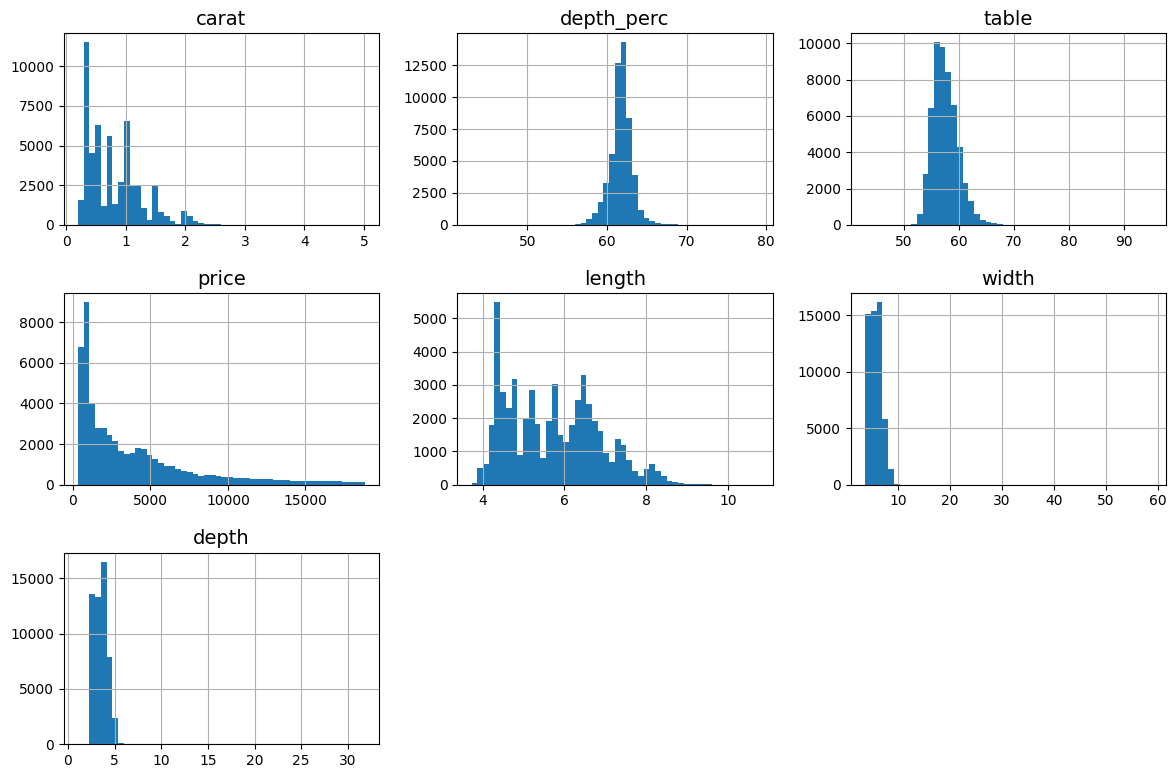

In [ ]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

# Bivariate Analysis using Scatter Plots

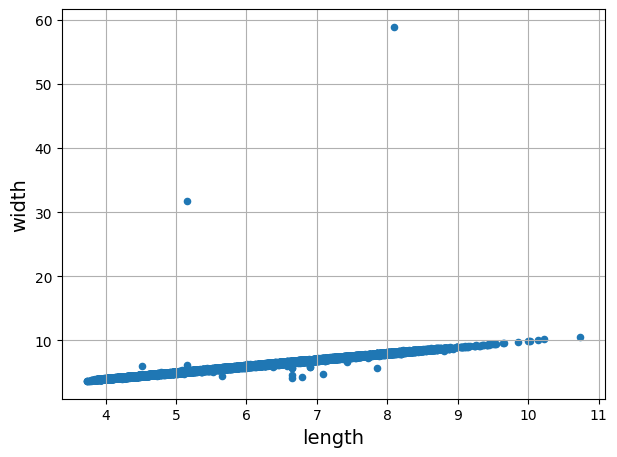

In [ ]:
data.plot(kind="scatter", x="length", y="width", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

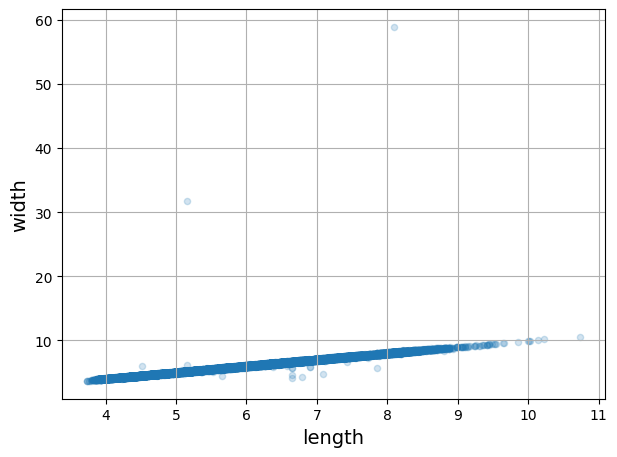

In [ ]:
data.plot(kind="scatter", x="length", y="width", grid=True,alpha = 0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

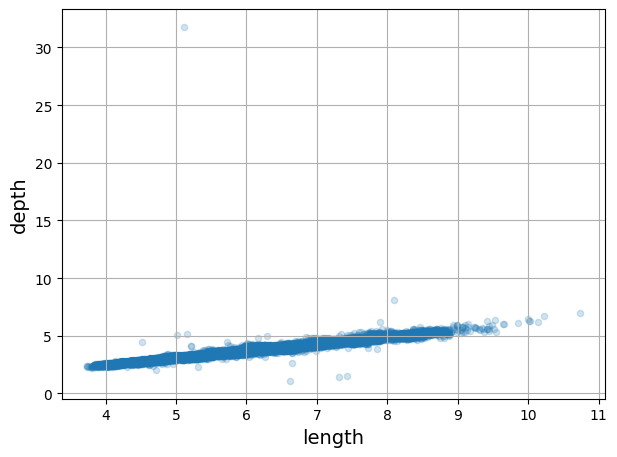

In [ ]:
data.plot(kind="scatter", x="length", y="depth", grid=True,alpha = 0.2)
save_fig("better_visualization_plot_len_dep")  # extra code
plt.show()

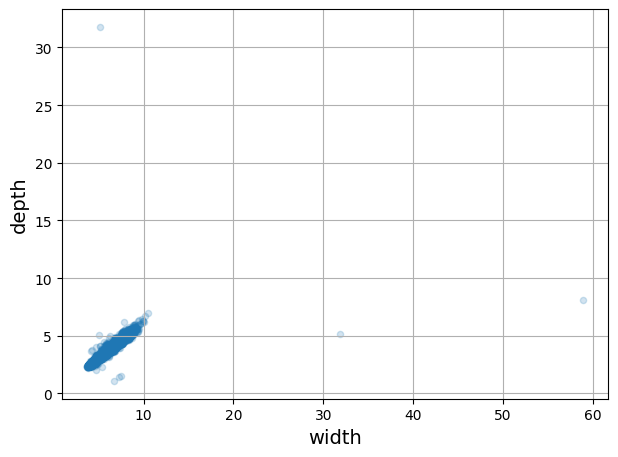

In [ ]:
data.plot(kind="scatter", x="width", y="depth", grid=True,alpha = 0.2)
save_fig("better_visualization_plot_width_dep")  # extra code
plt.show()

# Looking at price distribution by wrt multiple dimensions

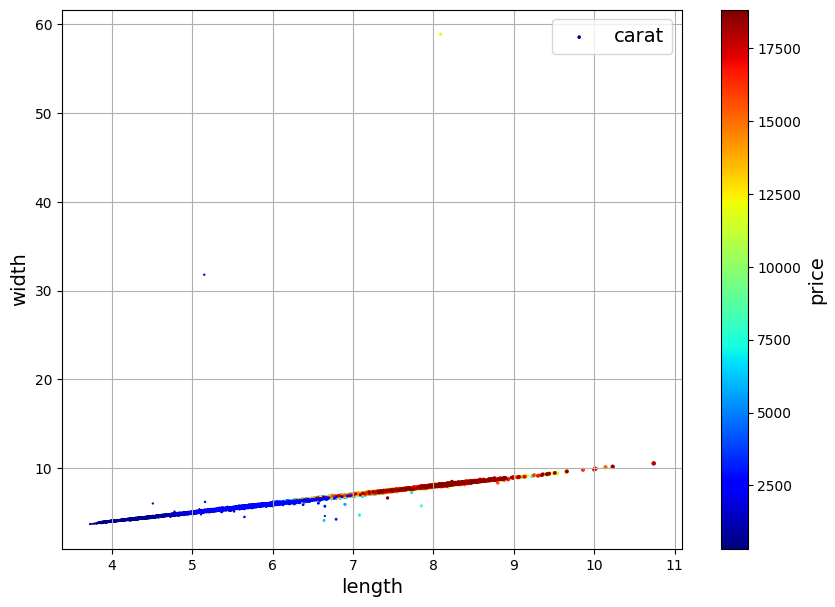

In [ ]:
data.plot(kind="scatter", x="length", y="width", grid=True,
             s=data["carat"] , label="carat",
             c="price", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

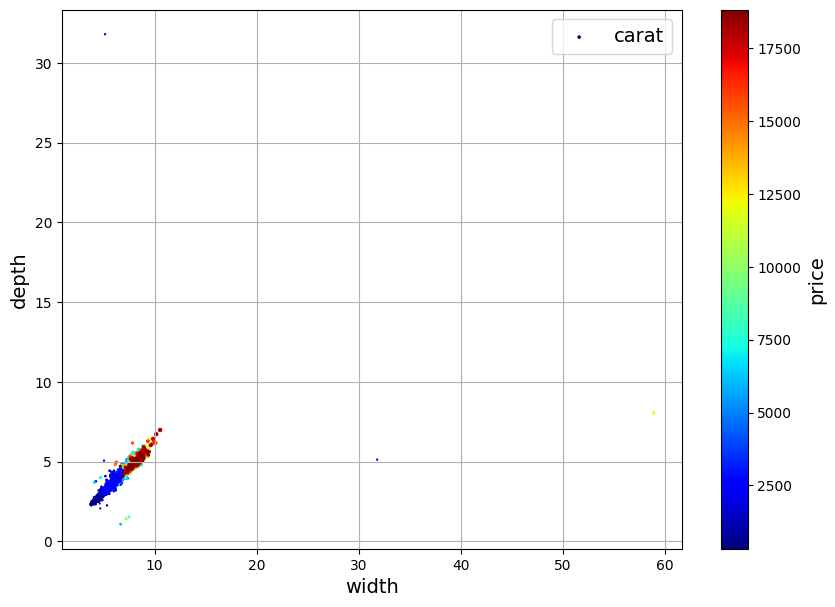

In [ ]:
data.plot(kind="scatter", x="width", y="depth", grid=True,
             s=data["carat"] , label="carat",
             c="price", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

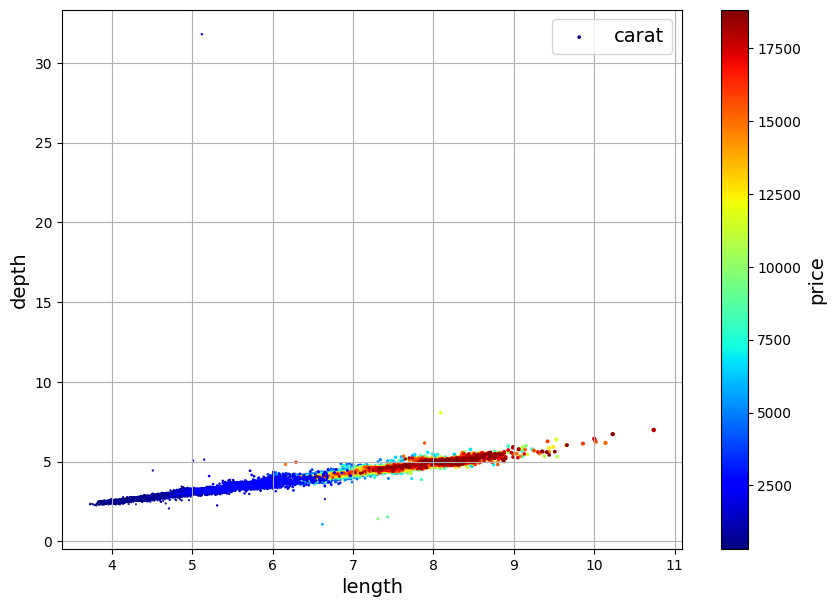

In [ ]:
data.plot(kind="scatter", x="length", y="depth", grid=True,
             s=data["carat"] , label="carat",
             c="price", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

## Bivariate analysis for categorical variables w Price

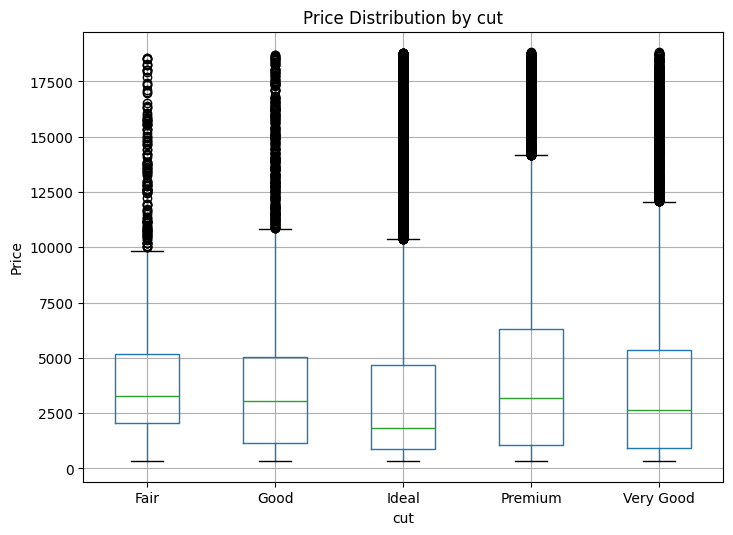

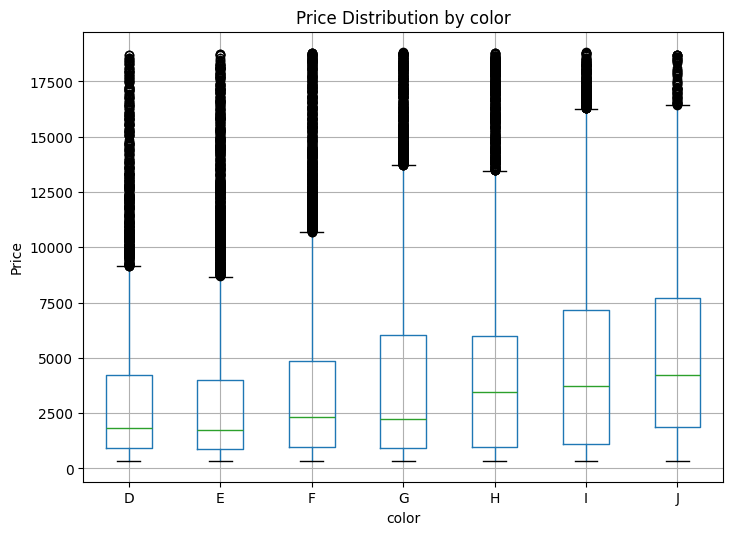

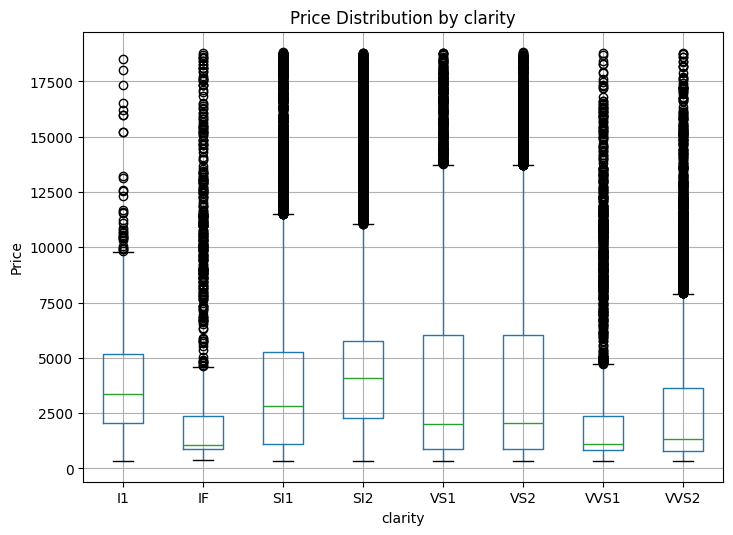

In [ ]:
import matplotlib.pyplot as plt

# Bivariate analysis for categorical variables with Price
for col in ['cut', 'color', 'clarity']:
    data.boxplot(column='price', by=col, figsize=(8, 6))
    plt.title(f'Price Distribution by {col}')
    plt.suptitle('')  # Remove the default boxplot title
    plt.ylabel('Price')
    plt.show()

## Looking for Correlations

In [ ]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix["price"].sort_values(ascending=False)

,price
price,1.000000
carat,0.921592
length,0.887231
depth,0.868206
width,0.867864
table,0.127245
depth_perc,-0.010729


### Visualizing Correlations

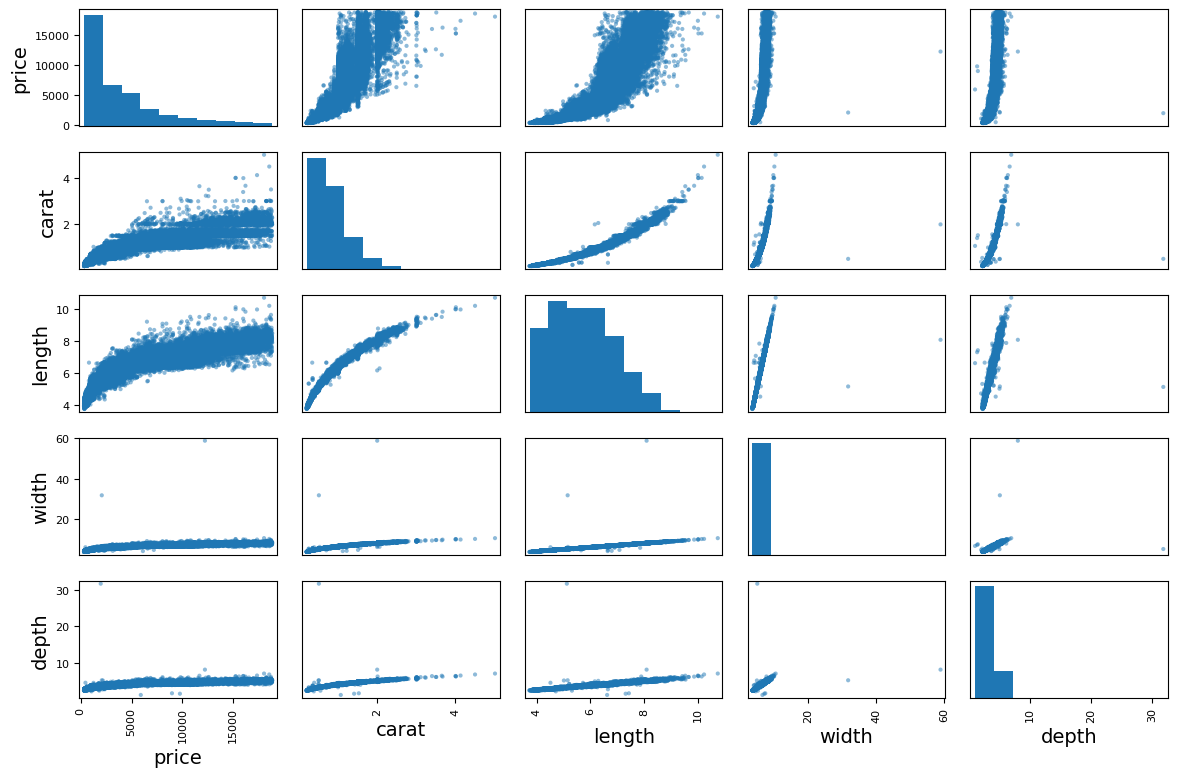

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["price", "carat", "length",
              "width","depth"]
scatter_matrix(data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

# Looking at distribution of Price wrt other columns

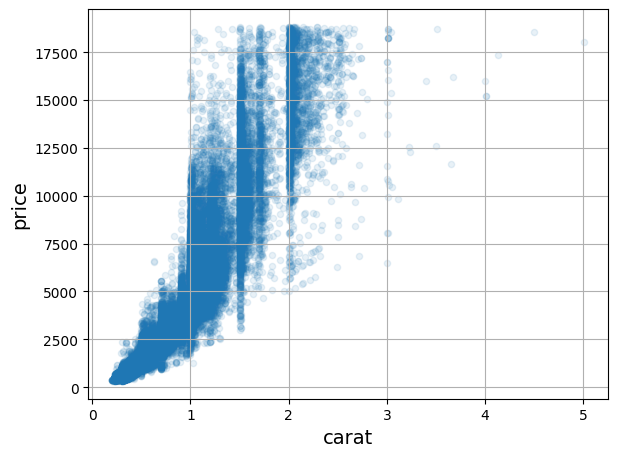

In [ ]:
data.plot(kind="scatter", x="carat", y="price",
             alpha=0.1, grid=True)
save_fig("price_vs_carat_scatterplot")  # extra code
plt.show()

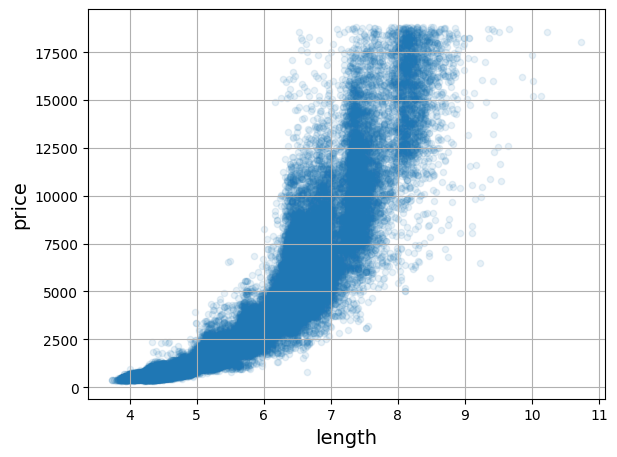

In [ ]:
data.plot(kind="scatter", x="length", y="price",
             alpha=0.1, grid=True)
save_fig("price_vs_length_scatterplot")  # extra code
plt.show()

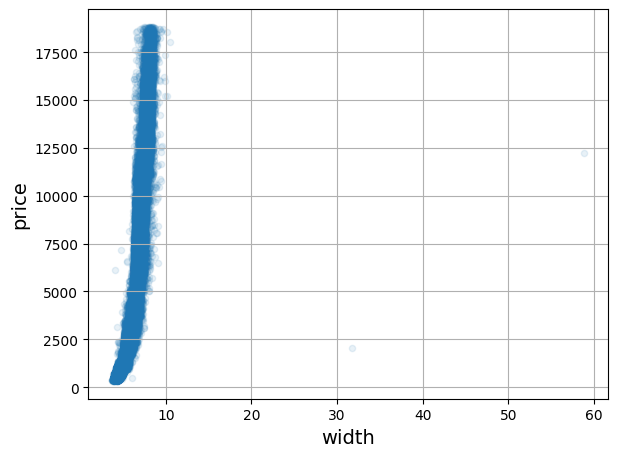

In [ ]:
data.plot(kind="scatter", x="width", y="price",
             alpha=0.1, grid=True)
save_fig("width_vs_length_scatterplot")  # extra code
plt.show()

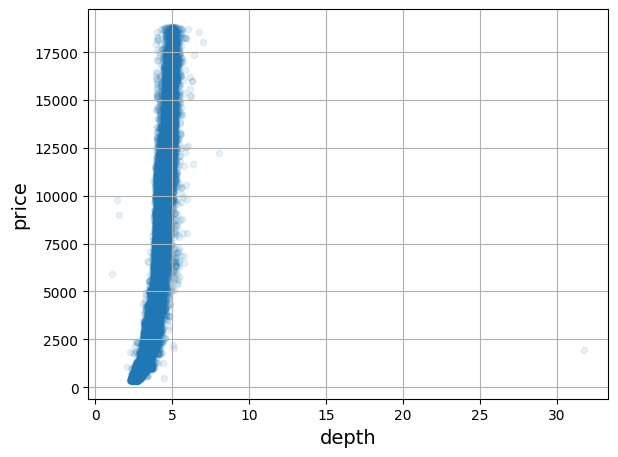

In [ ]:
data.plot(kind="scatter", x="depth", y="price",
             alpha=0.1, grid=True)
save_fig("price_vs_depth_scatterplot")  # extra code
plt.show()

### The distribution from scatter plot shows that the relation of length, widhth, and depth is not linear.

# Step 4: Data Preparation

Experimenting with Attribute Combinations
(Feature Engineering)

In [ ]:
data['volume'] = data['length'] * data['width'] * data['depth']
data['aspect_ratio'] = data['length'] / data['width']
data['weight_volume_ratio'] = data['carat'] / data['volume']
data['carat_length_interaction'] = data['carat'] * data['length']
data['carat_width_interaction'] = data['carat'] * data['width']
data['normalized_depth_perc'] = (data['depth_perc'] - data['depth_perc'].min()) / (data['depth_perc'].max() - data['depth_perc'].min())

### Checking the correlation of new columns

In [ ]:
corr_matrix = data.corr(numeric_only=True)
corr_matrix

,carat,depth_perc,table,price,length,width,depth,volume,aspect_ratio,weight_volume_ratio,carat_length_interaction,carat_width_interaction,normalized_depth_perc
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048,0.978280,0.126739,0.206805,0.994472,0.988605,0.028259
depth_perc,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023,0.009039,0.053081,0.295392,0.011721,0.009886,1.000000
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483,0.167809,0.128755,0.244693,0.175621,0.172864,-0.295733
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206,0.904255,0.079764,0.143440,0.923801,0.919196,-0.010729
length,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435,0.958533,0.142516,0.186772,0.953899,0.948188,-0.025017
width,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744,0.977016,0.002743,0.133413,0.930496,0.947750,-0.029069
depth,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000,0.951912,0.113000,0.169296,0.935246,0.932094,0.095023
volume,0.978280,0.009039,0.167809,0.904255,0.958533,0.977016,0.951912,1.000000,0.041384,0.128187,0.973644,0.989487,0.009039
aspect_ratio,0.126739,0.053081,0.128755,0.079764,0.142516,0.002743,0.113000,0.041384,1.000000,0.283877,0.126658,0.075531,0.053081
weight_volume_ratio,0.206805,0.295392,0.244693,0.143440,0.186772,0.133413,0.169296,0.128187,0.283877,1.000000,0.185929,0.165460,0.295392


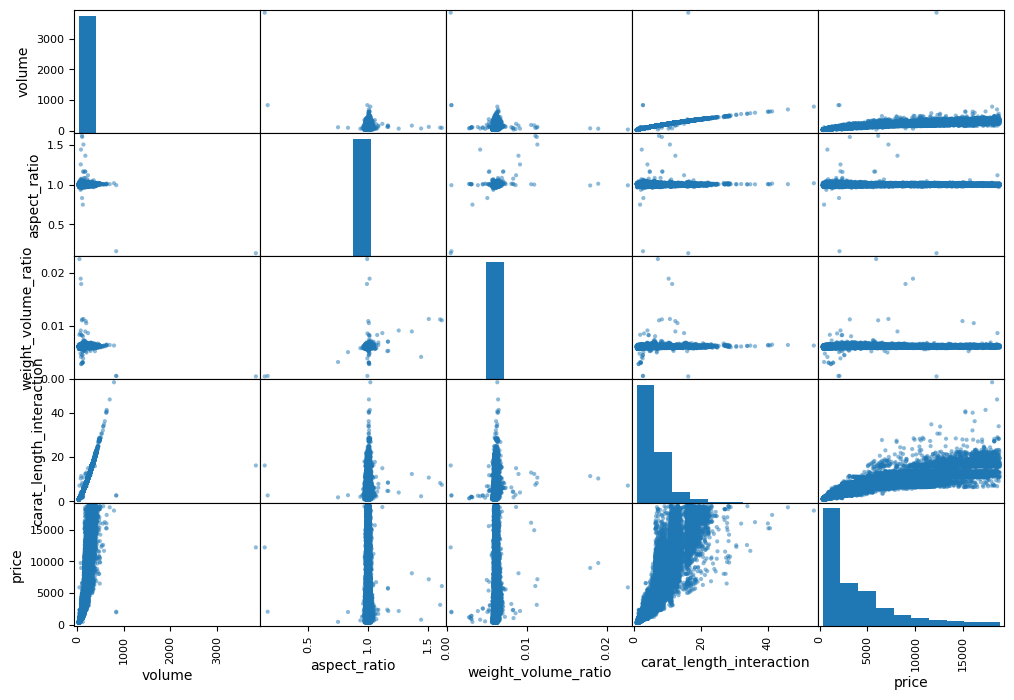

In [ ]:

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

attributes = ["volume", "aspect_ratio", "weight_volume_ratio", "carat_length_interaction","price"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

 No significant relation can be seen with Price from the scatterplot.

## Data Cleaning

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53920 entries, 0 to 53939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   carat                     53920 non-null  float64
 1   cut                       53920 non-null  object 
 2   color                     53920 non-null  object 
 3   clarity                   53920 non-null  object 
 4   depth_perc                53920 non-null  float64
 5   table                     53920 non-null  float64
 6   price                     53920 non-null  int64  
 7   length                    53920 non-null  float64
 8   width                     53920 non-null  float64
 9   depth                     53920 non-null  float64
 10  volume                    53920 non-null  float64
 11  aspect_ratio              53920 non-null  float64
 12  weight_volume_ratio       53920 non-null  float64
 13  carat_length_interaction  53920 non-null  float64
 14  carat_width

## As we can see that there are no null values, hence, no imputation or row/column drop is required.

In [ ]:
data.describe()

,carat,depth_perc,table,price,length,width,depth,volume,aspect_ratio,weight_volume_ratio,carat_length_interaction,carat_width_interaction,normalized_depth_perc
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046,129.897567,0.999425,0.006127,5.090691,5.090033,0.520820
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530,78.219789,0.011666,0.000178,4.050480,4.067610,0.039787
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000,31.707984,0.137351,0.000521,0.746000,0.736000,0.000000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.189759,0.992625,0.006048,1.880000,1.884000,0.500000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.840180,0.995745,0.006117,4.018000,4.025000,0.522222
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000,170.846415,1.006944,0.006190,6.801600,6.801600,0.541667
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000,3840.598060,1.615572,0.022647,53.807400,117.800000,1.000000


## Numerical Columns

### Detecting and Treating Outliers using Isolation Forest since the data is highly skewed

In [ ]:
X = data.select_dtypes(include=[np.number])

In [ ]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [ ]:
outlier_pred

array([-1, -1, -1, ...,  1,  1,  1])

In [ ]:
pd.DataFrame(outlier_pred).value_counts()

,count
0,
1,45726
-1,8194


# Code for dropping outliers

In [ ]:
data = data.iloc[outlier_pred == 1]

## Categorical Columns

Now let's preprocess the categorical input features, `cut`, `color`, `clarity`

In [ ]:
data_cat = data[['cut', 'color', 'clarity']]
data_cat.head(8)

,cut,color,clarity
3,Premium,I,VS2
4,Good,J,SI2
7,Very Good,H,SI1
10,Good,J,SI1
13,Ideal,J,SI2
15,Premium,E,I1
16,Ideal,I,SI2
17,Good,J,SI1


In [ ]:
data['cut'].value_counts()

,count
cut,
Ideal,19899
Premium,11687
Very Good,10156
Good,3607
Fair,377


In [ ]:
data['color'].value_counts()

,count
color,
G,9912
E,8643
F,8286
H,6751
D,6132
I,4073
J,1929


In [ ]:
data['clarity'].value_counts()

,count
clarity,
SI1,11204
VS2,10670
VS1,7115
SI2,6974
VVS2,4438
VVS1,3296
IF,1658
I1,371


## Ordinal encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(data_cat)

## One-hot encoding: Not Sparsed

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder(sparse_output=False)
# data_cat_1hot = cat_encoder.fit_transform(data_cat)
# data_cat_1hot

## Feature scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
width_min_max_scaled = min_max_scaler.fit_transform(data[['width']])

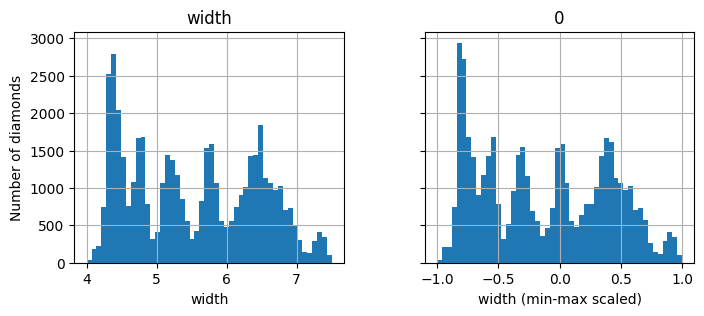

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
data[['width']].hist(ax=axs[0], bins=50)
pd.DataFrame(width_min_max_scaled).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("width")
axs[1].set_xlabel("width (min-max scaled)")
axs[0].set_ylabel("Number of diamonds")
plt.show()

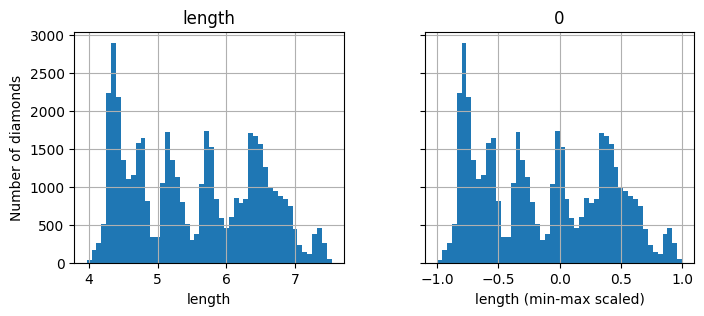

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
length_min_max_scaled = min_max_scaler.fit_transform(data[['length']])
data[['length']].hist(ax=axs[0], bins=50)
pd.DataFrame(length_min_max_scaled).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("length")
axs[1].set_xlabel("length (min-max scaled)")
axs[0].set_ylabel("Number of diamonds")
plt.show()

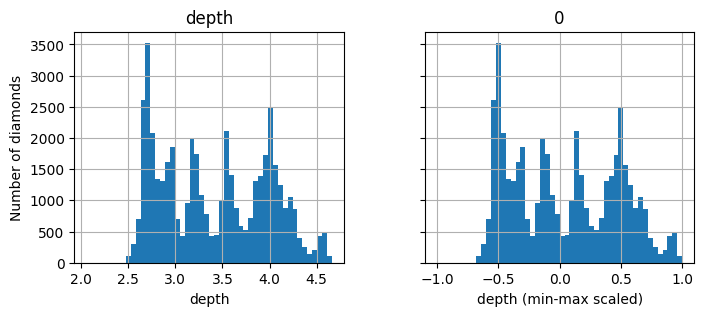

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
depth_min_max_scaled = min_max_scaler.fit_transform(data[['depth']])
data[['depth']].hist(ax=axs[0], bins=50)
pd.DataFrame(depth_min_max_scaled).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("depth")
axs[1].set_xlabel("depth (min-max scaled)")
axs[0].set_ylabel("Number of diamonds")
plt.show()

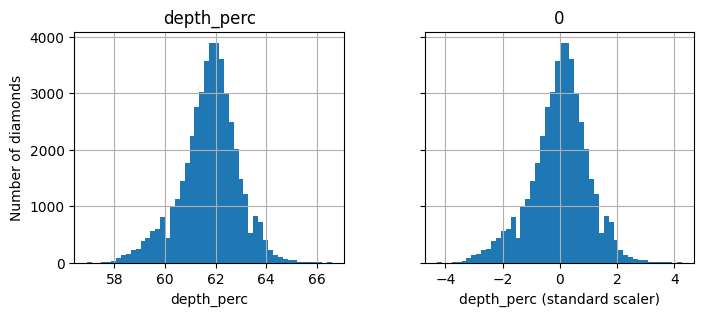

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
depth_perc_std_scaled = std_scaler.fit_transform(data[['depth_perc']])
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
data[['depth_perc']].hist(ax=axs[0], bins=50)
pd.DataFrame(depth_perc_std_scaled).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("depth_perc")
axs[1].set_xlabel("depth_perc (standard scaler)")
axs[0].set_ylabel("Number of diamonds")
plt.show()

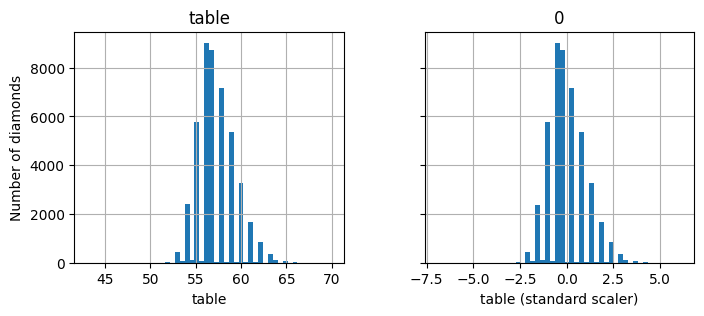

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
table_std_scaled = std_scaler.fit_transform(data[['table']])
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
data[['table']].hist(ax=axs[0], bins=50)
pd.DataFrame(table_std_scaled).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("table")
axs[1].set_xlabel("table (standard scaler)")
axs[0].set_ylabel("Number of diamonds")
plt.show()

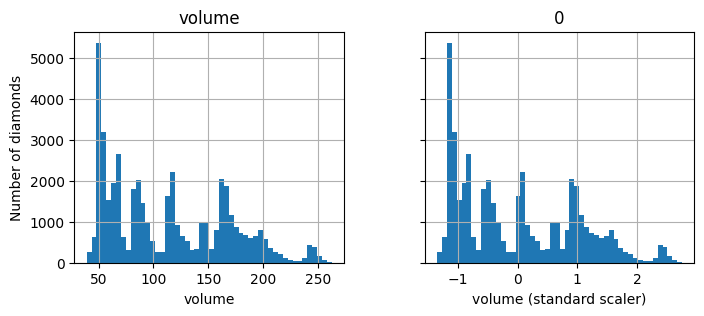

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
volume_std_scaled = std_scaler.fit_transform(data[['volume']])
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
data[['volume']].hist(ax=axs[0], bins=50)
pd.DataFrame(volume_std_scaled).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("volume")
axs[1].set_xlabel("volume (standard scaler)")
axs[0].set_ylabel("Number of diamonds")
plt.show()

Mostly all columns follow normal/multi-modal distribution.

## Transformation Pipelines

Pipeline for using only the original dataset attributes: both numerical and categorical

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Custom Transformer for Adding New Features
class FeatureAdder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.copy()
        X['volume'] = X['length'] * X['width'] * X['depth']
        X['aspect_ratio'] = X['length'] / X['width']
        X['weight_volume_ratio'] = X['carat'] / X['volume']
        X['carat_length_interaction'] = X['carat'] * X['length']
        X['carat_width_interaction'] = X['carat'] * X['width']
        X['normalized_depth_perc'] = (X['depth_perc'] - X['depth_perc'].min()) / (
            X['depth_perc'].max() - X['depth_perc'].min()
        )
        return X


# Pipelines for numerical and categorical data
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])
cat_pipeline = Pipeline([
    ('ordinal_encoder', OrdinalEncoder())
])

# Define attributes
num_attribs = [
    'carat', 'depth_perc', 'table',
    'length', 'width', 'depth', 'volume',
    'aspect_ratio', 'weight_volume_ratio',
    'carat_length_interaction', 'carat_width_interaction',
    'normalized_depth_perc'
]
cat_attribs = ['cut', 'color', 'clarity']

# Complete Preprocessing Pipeline
preprocessing = Pipeline([
    ('feature_adder', FeatureAdder()),
    ('column_transformer', ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ]))
])

##########################################################################
############### Stratified sampling with most correlated column ##########
##########################################################################

stratify_column = data['carat']  # Replace 'target' with your actual column name

# Perform stratified sampling
train_set, test_set = train_test_split(
    data, test_size=0.2, stratify=stratify_column, random_state=42
)

# Feature engineering pipeline (reuse the previous code here)
preprocessing = Pipeline([
    ('feature_adder', FeatureAdder()),
    ('column_transformer', ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ]))
])

# Fit and transform training data
train_prepared = preprocessing.fit_transform(train_set)

# Transform test data (do not fit again)
test_prepared = preprocessing.transform(test_set)

# Optionally convert to DataFrame for analysis
train_prepared_df = pd.DataFrame(train_prepared, columns=preprocessing.named_steps['column_transformer'].get_feature_names_out(), index=train_set.index)
test_prepared_df = pd.DataFrame(test_prepared, columns=preprocessing.named_steps['column_transformer'].get_feature_names_out(), index=test_set.index)


In [ ]:
train_prepared_df.shape

(36580, 15)

In [ ]:
test_prepared_df.shape

(9146, 15)

## Pre-processing training and test data and fitting model

# Select and Train a Model

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Models to fit
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.1),  # You can adjust alpha
    "Decision Tree": DecisionTreeRegressor(max_depth=5),  # Adjust max_depth as needed
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)  # Adjust hyperparameters
}

# Dictionaries to store results
model_results = {}
predictions = {}

# Train and evaluate each model
for name, model in models.items():
    # Fit the model
    model.fit(train_prepared, train_set['price'])

    # Predict on test data
    test_predictions = model.predict(test_prepared)

    # Evaluate the model
    mse = mean_squared_error(test_set['price'], test_predictions)
    r2 = r2_score(test_set['price'], test_predictions)

    # Store the results
    model_results[name] = {"MSE": mse, "R^2": r2}
    predictions[name] = test_predictions

# Display the results
import pandas as pd
results_df = pd.DataFrame(model_results).T
results_df


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.301e+10, tolerance: 2.546e+07
  model = cd_fast.enet_coordinate_descent(


,MSE,R^2
Linear Regression,976790.396970,0.866980
Lasso,995569.291988,0.864422
Decision Tree,629088.225913,0.914330
Random Forest,583429.692244,0.920548


## Selecting important features from the model

In [ ]:
# Combine feature importances from all models
feature_importance_df = pd.DataFrame({
    "Feature": preprocessing.named_steps['column_transformer'].get_feature_names_out(),
    "Lasso": abs(lasso_coefficients),
    "Decision Tree": models["Decision Tree"].feature_importances_,
    "Random Forest": models["Random Forest"].feature_importances_,
}).set_index("Feature")

# Sort by Random Forest Importance (or any other criteria)
feature_importance_df = feature_importance_df.sort_values(by="Random Forest", ascending=False)

# Display the DataFrame using pandas display function
# This is a standard method for displaying dataframes
display(feature_importance_df.style.set_caption("Feature Importances"))


,Lasso,Decision Tree,Random Forest
Feature,,,
num__carat_width_interaction,823.806892,0.786092,0.522873
num__volume,2988.565673,0.002230,0.282142
cat__clarity,213.486077,0.070370,0.072285
num__width,627.683467,0.071681,0.053150
num__carat_length_interaction,111.696248,0.032193,0.033594
cat__color,221.428499,0.036537,0.033308
num__length,2143.116613,0.000724,0.002215
num__carat,984.169052,0.000173,0.000337
num__depth,649.516435,0.000000,0.000081


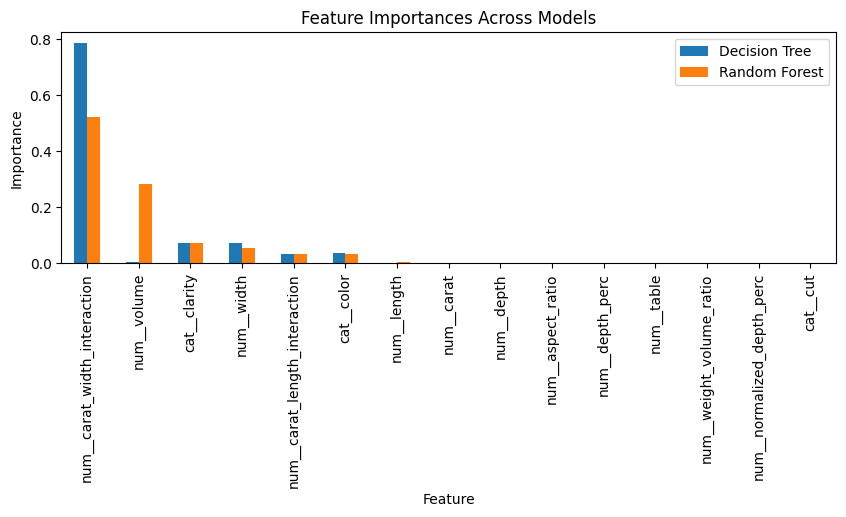

In [ ]:

# Optionally visualize feature importances
import matplotlib.pyplot as plt

feature_importance_df[['Decision Tree',	'Random Forest']].plot(kind="bar", figsize=(10, 3))
plt.title("Feature Importances Across Models")
plt.ylabel("Importance")
plt.show()

In [ ]:
feature_importance_df[feature_importance_df['Random Forest']>0].index

Index(['num__carat_width_interaction', 'num__volume', 'cat__clarity',
       'num__width', 'num__carat_length_interaction', 'cat__color',
       'num__length', 'num__carat', 'num__depth', 'num__aspect_ratio'],
      dtype='object', name='Feature')

**Observation:**
The new features engineered are coming as some of the most significant features, increasing the model accuracy and RMSE.

# Step 7: Model Selection

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Define the Random Forest model with specified hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Update the pipeline with the specified Random Forest model
rf_pipeline = Pipeline([
    ('feature_adder', FeatureAdder()),  # Add new features
    ('column_transformer', updated_preprocessing),  # Preprocessing with selected features
    ('rf', rf_model)  # Random Forest model with specified hyperparameters
])

# Fit the model on the training data
rf_pipeline.fit(train_set.drop(columns=['price']), train_set['price'])

# # Save the trained model
# model_filename = "rf_model_100_estimators_max_depth_5.pkl"
# joblib.dump(rf_pipeline, model_filename)
# print(f"Model saved to {model_filename}")

# Evaluate the model on the test set
test_predictions = rf_pipeline.predict(test_set.drop(columns=['price']))

# Calculate metrics
mse = mean_squared_error(test_set['price'], test_predictions)
r2 = r2_score(test_set['price'], test_predictions)

print(f"Test MSE: {mse}")
print(f"Test R^2: {r2*100}%")

Test MSE: 137156.39331458957
Test R^2: 98.13218856176807%


Since the Random forest model has the best performance (lowest MSE) and best R squared on test data (98%), our final model will be Random Forest Model.

# Cross-validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error
import numpy as np

# Define the Random Forest model with specified hyperparameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Pipeline with the specified Random Forest model
rf_pipeline = Pipeline([
    ('feature_adder', FeatureAdder()),  # Add new features
    ('column_transformer', updated_preprocessing),  # Preprocessing with selected features
    ('rf', rf_model)  # Random Forest model
])

# Define the scoring metric
scoring = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation
cv_scores = cross_val_score(
    rf_pipeline,
    train_set.drop(columns=['price']),  # Input features
    train_set['price'],  # Target variable
    cv=5,  # 5-fold cross-validation
    scoring=scoring,
    n_jobs=-1  # Use all available CPUs
)

# Convert scores to positive values for readability
cv_scores = -cv_scores  # Negative sign because we used neg_mean_squared_error

# Print cross-validation results
print(f"Cross-Validation MSE Scores: {cv_scores}")
print(f"Mean CV MSE: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV MSE: {np.std(cv_scores)}")

Cross-Validation MSE Scores: [134344.0256747  133623.70015687 125170.56000962 133468.46723239
 141337.19246949]
Mean CV MSE: 133588.78910861196
Standard Deviation of CV MSE: 5128.165641083827


In [ ]:
# Perform cross-validation with R^2 as the scoring metric
cv_r2_scores = cross_val_score(
    rf_pipeline,
    train_set.drop(columns=['price']),  # Input features
    train_set['price'],  # Target variable
    cv=5,  # 5-fold cross-validation
    scoring='r2',  # R^2 as the metric
    n_jobs=-1  # Use all available CPUs
)

print(f"Mean CV R^2: {np.mean(cv_r2_scores):.4f}")

Mean CV R^2: 0.9808


# Step 8: Fine Tuning

# Grid Search

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define a smaller parameter grid
param_grid = {
    'rf__n_estimators': [50, 100, 150],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5],
    'rf__min_samples_leaf': [1, 2],
}

# Wrap RandomizedSearchCV with tqdm for progress bar
class TQDMRandomizedSearchCV(RandomizedSearchCV):
    def __init__(self, estimator, param_distributions, *, n_iter=10, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', random_state=None, error_score=np.nan, return_train_score=False):
        super().__init__(estimator=estimator, param_distributions=param_distributions, n_iter=n_iter, scoring=scoring, n_jobs=n_jobs, refit=refit, cv=cv, verbose=verbose, pre_dispatch=pre_dispatch, random_state=random_state, error_score=error_score, return_train_score=return_train_score)
        self._progress_bar = None

    def fit(self, X, y=None, **fit_params):
        # Create progress bar
        self._progress_bar = tqdm(total=self.n_iter, desc="Tuning Progress")
        result = super().fit(X, y, **fit_params)
        self._progress_bar.close()
        return result

    def _run_search(self, evaluate_candidates):
        def wrapped_evaluate_candidates(candidate_params):
            self._progress_bar.update(len(candidate_params))
            return evaluate_candidates(candidate_params)

        super()._run_search(wrapped_evaluate_candidates)

# Instantiate the pipeline
rf_pipeline = Pipeline([
    ('feature_adder', FeatureAdder()),  # Ensure new features are added
    ('column_transformer', updated_preprocessing),
    ('rf', RandomForestRegressor(random_state=42))
])

# Use the customized RandomizedSearchCV
random_search = TQDMRandomizedSearchCV(
    rf_pipeline,
    param_distributions=param_grid,
    n_iter=20,  # Try 20 random combinations
    cv=3,       # Use fewer folds
    scoring='neg_mean_squared_error',
    verbose=0,  # Set verbose to 0 since tqdm will handle progress
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV with progress bar
train_subset = train_set.sample(frac=0.5, random_state=42)
random_search.fit(train_subset.drop(columns=['price']), train_subset['price'])

# Get best parameters
best_rf_pipeline = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

# Evaluate on the test set
test_predictions = best_rf_pipeline.predict(test_set.drop(columns=['price']))
mse = mean_squared_error(test_set['price'], test_predictions)
r2 = r2_score(test_set['price'], test_predictions)
print(f"Test MSE: {mse}")
print(f"Test R^2: {r2}")


## Saving final model

In [ ]:
import joblib

# Save the trained model to a file
model_filename = "best_random_forest_model.pkl"
joblib.dump(best_rf_pipeline, model_filename)
print(f"Model saved to {model_filename}")

## Causal ML

In [20]:
!pip install causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.3/144.3 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: Cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstal

In [38]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from xgboost import XGBRegressor
import warnings

from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
from causalml.propensity import ElasticNetPropensityModel
from causalml.dataset import *
from causalml.metrics import *

warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

%matplotlib inline

ERROR:duecredit:Failed to import duecredit due to No module named 'duecredit'


In [58]:
data.head()

,carat,cut,color,clarity,depth_perc,table,price,length,width,depth
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# Causal inference

### **Hypothesis**: Having an "Ideal" cut significantly increases the price of a diamond.
The hypothesis assumes that the "Ideal" cut influences the diamond's price positively, regardless of other factors like carat, depth, table, color, and clarity.


- **Null Hypothesis (\(H_0\))**: There is no significant effect of the "Ideal" cut on the price.
  


- **Alternative Hypothesis (\(H_1\))**: There is a significant effect of the "Ideal" cut on the price.
  



Firstly, we aim to use Single Learner Model to evaluate the causal impact of having an "Ideal" cut on diamond prices.

**Treatment:**

The treatment variable is *is_ideal_cut*, which indicates whether a diamond has an "Ideal" cut. This treatment is hypothesized to influence the price of the diamond positively.


**Outcome:**

The outcome variable is *price*, representing the diamond's monetary value. We aim to estimate how much the price increases on average due to the treatment.


**Features:**

The features used for modeling include:

**Numerical Features:** Characteristics like *carat, length, width, depth, and table*, which describe the physical dimensions of the diamond.

**Categorical Features:** Attributes like *color and clarity*, which are one-hot encoded to include all levels except the first.



In [71]:
# Load dataset
diamonds = data.copy()

# Define treatment and outcome
diamonds['is_ideal_cut'] = (diamonds['cut'] == 'Ideal').astype(int)  # Treatment
# diamonds['log_price'] = np.log(diamonds['price'])  # Outcome

# Features
X = diamonds[['carat', 'length',	'width', 'depth', 'table']]
treatment = diamonds['is_ideal_cut']
y = diamonds['price']

diamonds = pd.get_dummies(diamonds, columns=['color', 'clarity'], drop_first=True)
X = diamonds[['carat','length',	'width', 'depth', 'table'] + [col for col in diamonds.columns if 'color_' in col or 'clarity_' in col]]

X = X.replace({True: 1, False: 0})

In [106]:
# Ready-to-use S-Learner using LinearRegression
learner_s = LRSRegressor()
ate_s = learner_s.estimate_ate(X=X, treatment=treatment, y=y)
print(ate_s)
print('ATE estimate: {:.03f}'.format(ate_s[0][0]))
print('ATE lower bound: {:.03f}'.format(ate_s[1][0]))
print('ATE upper bound: {:.03f}'.format(ate_s[2][0]))

(array([161.60727006]), array([125.40020301]), array([197.81433712]))
ATE estimate: 161.607
ATE lower bound: 125.400
ATE upper bound: 197.814


**Interpretation:**

Average Treatment Effect Estimate: 161.607

The result shows that, on average, diamonds with an "Ideal" cut have a price increase of $161.61 compared to diamonds without an "Ideal" cut, controlling for other factors like carat, depth, and clarity.

Confidence Interval:

Lower Bound: $125.40

Upper Bound: $197.81

The confidence interval indicates that the true treatment effect is likely between 125.40 and $197.81, with high confidence (typically 95%).

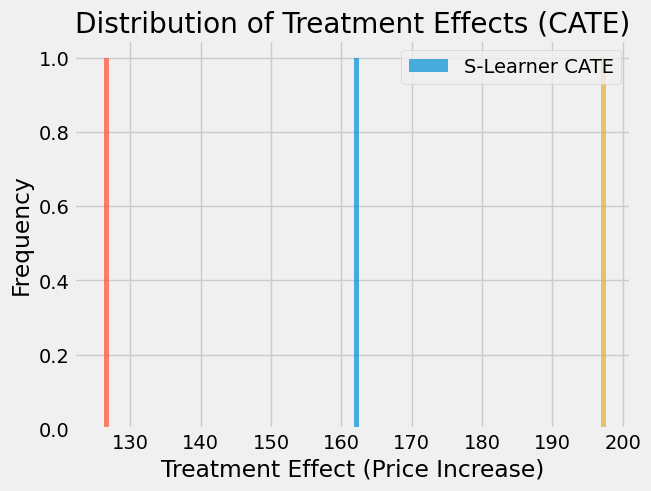

In [107]:
import matplotlib.pyplot as plt
plt.hist(ate_s, bins=30, alpha=0.7, label="S-Learner CATE")
plt.xlabel("Treatment Effect (Price Increase)")
plt.ylabel("Frequency")
plt.title("Distribution of Treatment Effects (CATE)")
plt.legend()
plt.show()

**Exploring Heterogeneous Effects**

After estimating the Average Treatment Effect (ATE) using the S-Learner model, we will now investigate whether the treatment effect (having an "Ideal" cut) varies across different carat categories. This analysis helps us understand the heterogeneous effects of the treatment, providing insights into how the impact of the "Ideal" cut differs for diamonds of varying sizes.

**Objective**
The goal is to evaluate if the treatment effect is influenced by the carat weight of the diamonds.

Specifically, we will group diamonds into three carat categories: Small, Medium, and Large.

Calculate the mean price for each category to understand their base price levels.

Estimate and visualize the Conditional Average Treatment Effects (CATE) to determine how the "Ideal" cut affects diamonds differently across these categories.

In [109]:
diamonds['carat_category'] = pd.cut(diamonds['carat'], bins=[0, 1, 2, 3], labels=["Small", "Medium", "Large"])
subgroup_ate = diamonds.groupby('carat_category')['price'].mean()
print(subgroup_ate)

carat_category
Small      1786.802657
Medium     7608.549446
Large     14940.472177
Name: price, dtype: float64


**Observations:**


*   Large diamonds are significantly more expensive than medium and small diamonds, which aligns with the general understanding that carat weight is a primary determinant of diamond price.
*   The difference in average prices suggests that the treatment effect of having an "Ideal" cut may vary across carat categories. Larger diamonds may experience a higher absolute price increase due to the "Ideal" cut, as their base price is already higher.






In [110]:
diamonds['carat_category'].unique()

['Small', 'Medium', 'Large', NaN]
Categories (3, object): ['Small' < 'Medium' < 'Large']

## Heterogeneous Effects by Carat Category:

In [89]:
# Calculate ATE by carat category
for category in diamonds['carat_category'].unique():
  if category is not np.nan:
    category_data = diamonds[diamonds['carat_category'] == category]
    category_X = category_data[['carat', 'depth', 'table']]
    category_treatment = category_data['is_ideal_cut']
    category_y = category_data['price']

    learner_s = LRSRegressor()
    learner_s.fit(X=category_X, treatment=category_treatment, y=category_y)
    category_ate = learner_s.estimate_ate(X=category_X, treatment=category_treatment, y=category_y)

    print(f"Carat Category: {category}, ATE: {category_ate[0][0]:.2f} (USD)")


Carat Category: Small, ATE: 115.52 (USD)
Carat Category: Medium, ATE: 685.79 (USD)
Carat Category: Large, ATE: 889.12 (USD)


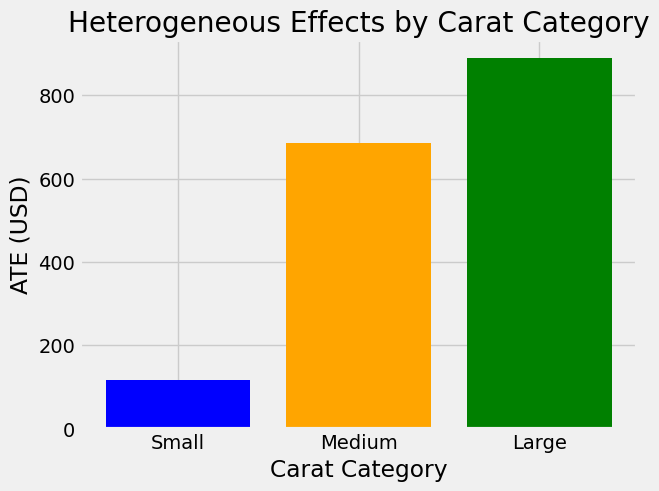

In [111]:
categories = ['Small', 'Medium', 'Large']
ate_values = [115.52, 685.79, 889.12]

plt.bar(categories, ate_values, color=['blue', 'orange', 'green'])
plt.xlabel('Carat Category')
plt.ylabel('ATE (USD)')
plt.title('Heterogeneous Effects by Carat Category')
plt.show()


**Insights:**



*   **Positive Impact Across All Categories:** Having an "Ideal" cut positively impacts the price across all carat categories, supporting the hypothesis that cut quality plays a crucial role in diamond valuation.

*   **Stronger Effect for Larger Diamonds:** The magnitude of the treatment effect increases with diamond size. This suggests that the "Ideal" cut becomes increasingly valuable as the base price of the diamond rises.








## Checking statistical significance using Bootstraping

In [114]:
import numpy as np

def bootstrap_ate(data, category, num_bootstrap=1000):
    bootstrap_ates = []
    for _ in range(num_bootstrap):
        sample = data[data['carat_category'] == category].sample(frac=1, replace=True)
        sample_X = sample[['carat', 'depth', 'table']]
        sample_treatment = sample['is_ideal_cut']
        sample_y = sample['price']

        learner = LRSRegressor()
        learner.fit(X=sample_X, treatment=sample_treatment, y=sample_y)
        bootstrap_ates.append(learner.estimate_ate(X=sample_X, treatment=sample_treatment, y=sample_y)[0][0])
    return np.percentile(bootstrap_ates, [2.5, 97.5])  # 95% confidence interval

# Calculate bootstrap confidence intervals for each category
for category in diamonds['carat_category'].unique():
  if category is not np.nan:
    ci = bootstrap_ate(diamonds, category)
    print(f"Carat Category: {category}, 95% CI: {ci}")


Carat Category: Small, 95% CI: [ 84.27072252 129.47114504]
Carat Category: Medium, 95% CI: [592.20369011 784.78435076]
Carat Category: Large, 95% CI: [ 578.2896117  1157.29046912]


**Statistical Significance:**

The 95% Confidence Intervals (CIs) for all categories do not include zero, which means the treatment effect is statistically significant for all carat categories.

**Overlap Between Categories:**


*   There is a slight overlap between the CIs of medium and large diamonds, indicating that the treatment effects for these categories may not be significantly different.
*   The CI for small diamonds does not overlap with the CIs for medium and large diamonds, suggesting that the treatment effect for small diamonds is significantly different from the others.






# T- Learner

**Base Models:**

Two different base models are used for the T-Learner:


*   **XGBoost Regressor:** A gradient-boosting model that captures non-linear relationships in the data.
*   **Linear Regression:** A simpler model that assumes linear relationships between the features and outcomes.





In [117]:
# Calling the Base Learner class and feeding in XGB
learner_t = BaseTRegressor(learner=XGBRegressor())
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseTRegressor class and using XGB')
print(ate_t)

# Calling the Base Learner class and feeding in LinearRegression
learner_t = BaseTRegressor(learner=LinearRegression())
ate_t = learner_t.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseTRegressor class and using Linear Regression')
print(ate_t)


Using the BaseTRegressor class and using XGB
(array([213.56303698]), array([205.29451512]), array([221.83155884]))

Using the BaseTRegressor class and using Linear Regression
(array([182.08066857]), array([163.00289587]), array([201.15844127]))


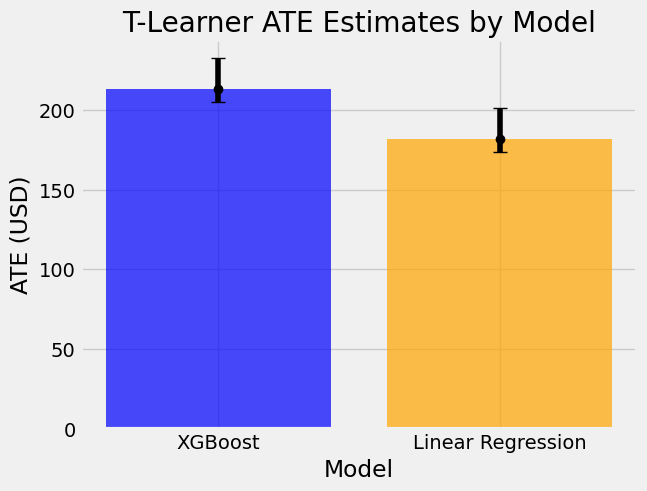

In [118]:
import matplotlib.pyplot as plt

models = ['XGBoost', 'Linear Regression']
ate_estimates = [213.56, 182.08]
lower_bounds = [205.29, 163.00]
upper_bounds = [221.83, 201.16]

plt.bar(models, ate_estimates, color=['blue', 'orange'], alpha=0.7, capsize=5)
plt.errorbar(models, ate_estimates,
             yerr=[(ate - lb, ub - ate) for ate, lb, ub in zip(ate_estimates, lower_bounds, upper_bounds)],
             fmt='o', color='black', capsize=5)
plt.title('T-Learner ATE Estimates by Model')
plt.ylabel('ATE (USD)')
plt.xlabel('Model')
plt.show()


**Key Insights:**

**XGBoost Results:**

ATE Estimate: Diamonds with an "Ideal" cut have a predicted price increase of $213.56 on average.

Confidence Interval: The true ATE likely falls between 205.29 and $221.83, showing high precision.

**Linear Regression Results:**

ATE Estimate: The average price increase due to the "Ideal" cut is $182.08, slightly lower than XGBoost.

Confidence Interval: The range is wider (163.00 to $201.16), indicating lower precision compared to XGBoost.

**Model Comparison:**

XGBoost captures more complex, non-linear relationships in the data, resulting in a higher ATE estimate and narrower confidence interval.
Linear Regression, while simpler, still produces a meaningful estimate but with slightly less precision.

## Heterogeneous Effects by Carat Category:

In [123]:
from causalml.inference.meta import BaseTRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Initialize results dictionary to store ATEs for each subgroup
subgroup_ate_results = {}

# Perform subgroup analysis for carat categories
for category in diamonds['carat_category'].unique():
    if category is not np.nan:
        # Filter data for the specific carat category
        category_data = diamonds[diamonds['carat_category'] == category]
        category_X = category_data[['carat', 'depth', 'table']]  # Features
        category_treatment = category_data['is_ideal_cut']       # Treatment
        category_y = category_data['price']                     # Outcome

        # T-Learner with XGBoost
        learner_t_xgb = BaseTRegressor(learner=XGBRegressor())
        learner_t_xgb.fit(X=category_X, treatment=category_treatment, y=category_y)
        ate_xgb = learner_t_xgb.estimate_ate(X=category_X, treatment=category_treatment, y=category_y)

        # T-Learner with Linear Regression
        learner_t_lr = BaseTRegressor(learner=LinearRegression())
        learner_t_lr.fit(X=category_X, treatment=category_treatment, y=category_y)
        ate_lr = learner_t_lr.estimate_ate(X=category_X, treatment=category_treatment, y=category_y)

        # Store results
        subgroup_ate_results[category] = {
            'ATE_XGBoost': ate_xgb[0][0],  # ATE estimate from XGBoost
            'ATE_LinearRegression': ate_lr[0][0]  # ATE estimate from Linear Regression
        }

# Display results
for category, results in subgroup_ate_results.items():
    print(f"Carat Category: {category}")
    print(f"  ATE (XGBoost): {results['ATE_XGBoost']:.2f} USD")
    print(f"  ATE (Linear Regression): {results['ATE_LinearRegression']:.2f} USD\n")


Carat Category: Small
  ATE (XGBoost): 149.85 USD
  ATE (Linear Regression): 136.47 USD

Carat Category: Medium
  ATE (XGBoost): 671.13 USD
  ATE (Linear Regression): 689.30 USD

Carat Category: Large
  ATE (XGBoost): 1151.47 USD
  ATE (Linear Regression): 1023.85 USD



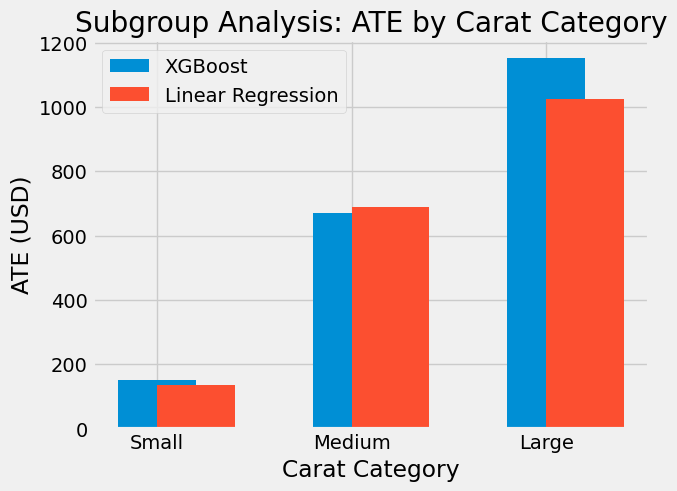

In [93]:
import matplotlib.pyplot as plt

# Prepare data for visualization
categories = list(subgroup_ate_results.keys())
xgb_ates = [res['ATE_XGBoost'] for res in subgroup_ate_results.values()]
lr_ates = [res['ATE_LinearRegression'] for res in subgroup_ate_results.values()]

# Plot
x = range(len(categories))
plt.bar(x, xgb_ates, width=0.4, label='XGBoost', align='center')
plt.bar(x, lr_ates, width=0.4, label='Linear Regression', align='edge')
plt.xticks(x, categories)
plt.xlabel('Carat Category')
plt.ylabel('ATE (USD)')
plt.title('Subgroup Analysis: ATE by Carat Category')
plt.legend()
plt.show()


**Insights:**

*General Trend:*

The treatment effect (price increase due to the "Ideal" cut) grows significantly as the carat category increases.
This trend aligns with the expectation that higher-value diamonds benefit more from superior cut quality.

*Model Comparison:*

XGBoost:
Produces slightly higher ATE estimates for all carat categories, particularly for large diamonds.
Likely captures more nuanced, non-linear relationships between the features and outcomes.

Linear Regression:
Provides slightly lower ATE estimates compared to XGBoost but still demonstrates the same trend (small < medium < large).

## X-Learner

In [125]:
# X Learner without propensity score input
# Calling the Base Learner class and feeding in XGB
learner_x = BaseXRegressor(XGBRegressor())
ate_x_xgb = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
print('Using the BaseXRegressor class and using XGB without propensity score input:')
print(ate_x_xgb)

# Calling the Base Learner class and feeding in LinearRegression
learner_x = BaseXRegressor(learner=LinearRegression())
ate_x_lr = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
print('\nUsing the BaseXRegressor class and using Linear Regression without propensity score input:')
print(ate_x_lr)

Using the BaseXRegressor class and using XGB without propensity score input:
(array([183.24590213]), array([175.73350736]), array([190.7582969]))

Using the BaseXRegressor class and using Linear Regression without propensity score input:
(array([182.08066857]), array([163.00289586]), array([201.15844127]))


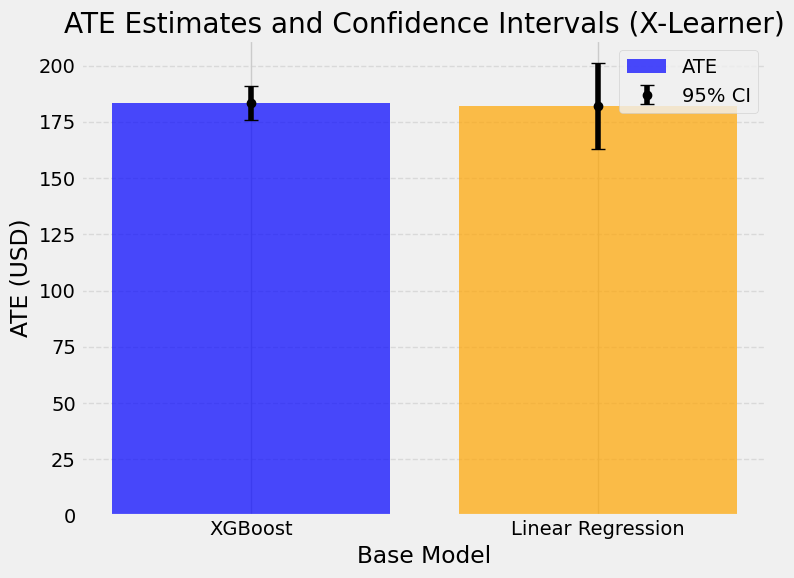

In [126]:
import matplotlib.pyplot as plt

# Results from X-Learner
models = ["XGBoost", "Linear Regression"]
ate_estimates = [ate_x_xgb[0][0], ate_x_lr[0][0]]  # ATE estimates
lower_bounds = [ate_x_xgb[1][0], ate_x_lr[1][0]]  # Lower bounds of CI
upper_bounds = [ate_x_xgb[2][0], ate_x_lr[2][0]]  # Upper bounds of CI

# Compute error bars for visualization
errors = [(ate - lb, ub - ate) for ate, lb, ub in zip(ate_estimates, lower_bounds, upper_bounds)]

# Plot bar chart with error bars
plt.figure(figsize=(8, 6))
plt.bar(models, ate_estimates, color=['blue', 'orange'], alpha=0.7, capsize=5, label="ATE")
plt.errorbar(models, ate_estimates, yerr=np.array(errors).T, fmt='o', color='black', capsize=5, label="95% CI")

# Add labels and title
plt.title("ATE Estimates and Confidence Intervals (X-Learner)")
plt.xlabel("Base Model")
plt.ylabel("ATE (USD)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Show plot
plt.show()


**Insights:**

*Treatment Effect Magnitude:*

The Average Treatment Effect (ATE) represents the average increase in the diamond price due to the "Ideal" cut.

Both models provide very similar ATE estimates:

XGBoost: $183.25

Linear Regression: $182.08

This suggests that the "Ideal" cut has a consistent and significant impact on diamond prices regardless of the model used.

*Model Comparison:*


*   XGBoost:
Slightly higher ATE and narrower confidence intervals. A better choice if the dataset contains complex non-linear relationships.
*   Linear Regression:
Produces similar results but with wider confidence intervals.






A simpler model, better suited for datasets with linear relationships.


In [127]:
from causalml.inference.meta import BaseXRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

# Initialize results dictionary to store ATEs and confidence intervals for each subgroup
subgroup_ate_results = {}

# Iterate over carat categories
for category in diamonds['carat_category'].unique():
    if category is not np.nan:
        # Filter data for the specific carat category
        category_data = diamonds[diamonds['carat_category'] == category]
        category_X = category_data[['carat', 'depth', 'table']]  # Features
        category_treatment = category_data['is_ideal_cut']       # Treatment
        category_y = category_data['price']                     # Outcome

        # X-Learner with XGBoost
        learner_x_xgb = BaseXRegressor(learner=XGBRegressor())
        learner_x_xgb.fit(X=category_X, treatment=category_treatment, y=category_y)
        ate_xgb = learner_x_xgb.estimate_ate(X=category_X, treatment=category_treatment, y=category_y)

        # X-Learner with Linear Regression
        learner_x_lr = BaseXRegressor(learner=LinearRegression())
        learner_x_lr.fit(X=category_X, treatment=category_treatment, y=category_y)
        ate_lr = learner_x_lr.estimate_ate(X=category_X, treatment=category_treatment, y=category_y)

        # Store results for the carat category
        subgroup_ate_results[category] = {
            'ATE_XGBoost': ate_xgb[0][0],  # ATE estimate (XGBoost)
            'Lower_XGBoost': ate_xgb[1][0],  # Lower bound (XGBoost)
            'Upper_XGBoost': ate_xgb[2][0],  # Upper bound (XGBoost)
            'ATE_LinearRegression': ate_lr[0][0],  # ATE estimate (Linear Regression)
            'Lower_LinearRegression': ate_lr[1][0],  # Lower bound (Linear Regression)
            'Upper_LinearRegression': ate_lr[2][0]  # Upper bound (Linear Regression)
        }

# Display results
for category, results in subgroup_ate_results.items():
    print(f"Carat Category: {category}")
    print(f"  ATE (XGBoost): {results['ATE_XGBoost']:.2f} USD (95% CI: {results['Lower_XGBoost']:.2f}, {results['Upper_XGBoost']:.2f})")
    print(f"  ATE (Linear Regression): {results['ATE_LinearRegression']:.2f} USD (95% CI: {results['Lower_LinearRegression']:.2f}, {results['Upper_LinearRegression']:.2f})\n")


Carat Category: Small
  ATE (XGBoost): 140.35 USD (95% CI: 130.66, 150.04)
  ATE (Linear Regression): 136.47 USD (95% CI: 124.34, 148.59)

Carat Category: Medium
  ATE (XGBoost): 642.30 USD (95% CI: 574.69, 709.91)
  ATE (Linear Regression): 689.30 USD (95% CI: 610.72, 767.88)

Carat Category: Large
  ATE (XGBoost): 1031.66 USD (95% CI: 879.56, 1183.77)
  ATE (Linear Regression): 1023.85 USD (95% CI: 776.29, 1271.41)



### Insights

**General Trend:**


*   The treatment effect (price increase due to the "Ideal" cut) grows consistently across carat categories: Small < Medium < Large.
*   This aligns with the expectation that higher-carat diamonds benefit more from a superior cut.

**Model Comparison:**

*XGBoost:*


*   Produces slightly lower ATE estimates than Linear Regression for the Medium and Large categories.
*   Confidence intervals are narrower, indicating more precise estimates.

*Linear Regression:*

*   Provides slightly higher ATE estimates but with wider confidence intervals, reflecting less precision in its estimates.





[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

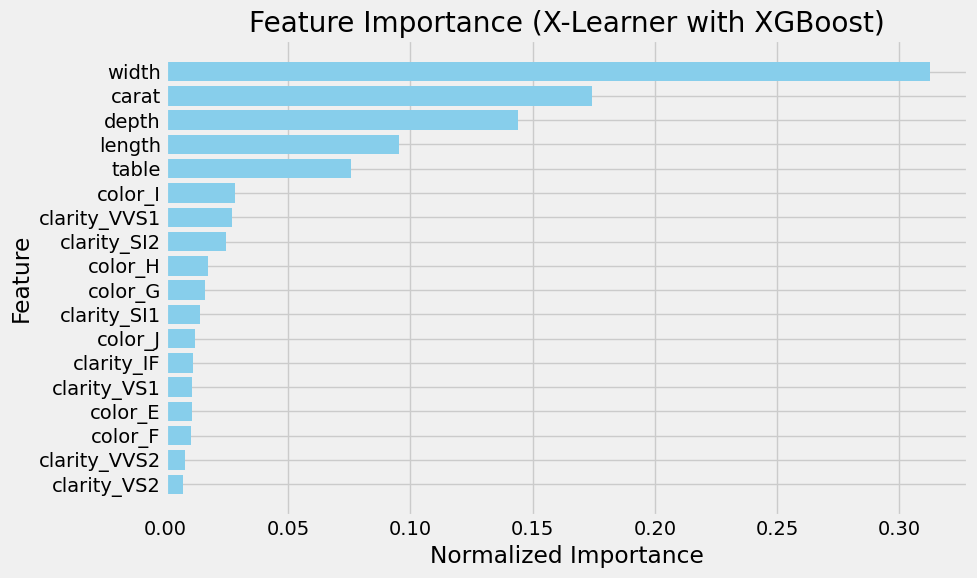

In [147]:
# X Learner without propensity score input
# Calling the Base Learner class and feeding in XGB
learner_x = BaseXRegressor(XGBRegressor())
ate_x_xgb = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
xlearner_tau_xgb = learner_x.predict(X=X, treatment=treatment, y=y)  # Treatment effect predictions for XGBoost

feature_importance_xgb = learner_x.get_importance(
    X=X,
    tau=xlearner_tau_xgb,  # Predicted treatment effects
    normalize=True,
    method='auto',  # Automatically determine the importance calculation method
    features=X.columns.tolist()  # Provide the feature names
)

# Ensure proper conversion for feature importance
importance_df_xgb = pd.DataFrame({
    "Feature": list(feature_importance_xgb[1].index),  # Extract keys as feature names
    "Importance": [float(value) for value in feature_importance_xgb[1].values]  # Convert arrays to scalars
}).sort_values(by="Importance", ascending=False)

# Plot feature importance for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(
    y=importance_df_xgb["Feature"],
    width=importance_df_xgb["Importance"],
    color="skyblue"
)
plt.xlabel("Normalized Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (X-Learner with XGBoost)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Graphs for Linear Regressor

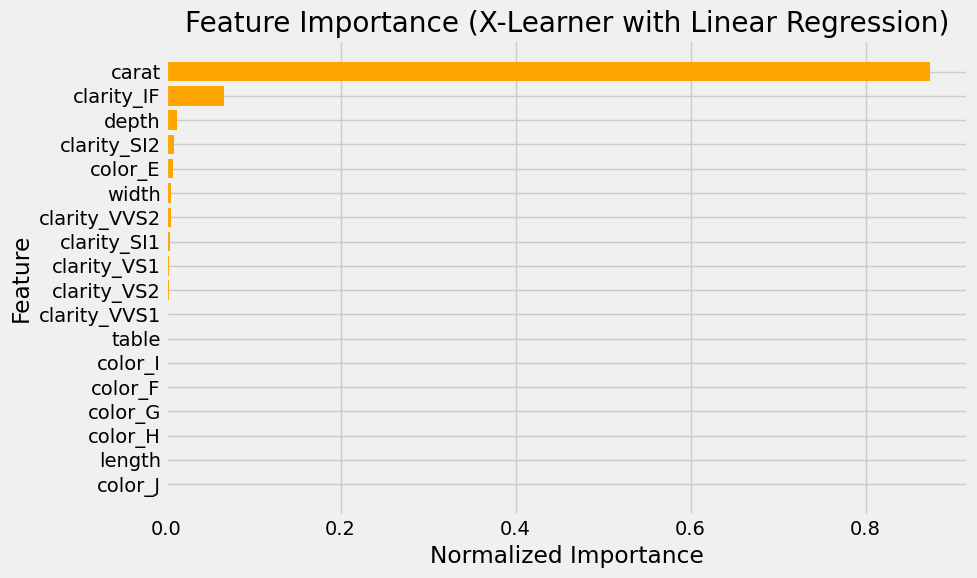

In [151]:
# Repeat the same process for Linear Regression
learner_x = BaseXRegressor(learner=LinearRegression())
ate_x_lr = learner_x.estimate_ate(X=X, treatment=treatment, y=y)
xlearner_tau_lr = learner_x.predict(X=X, treatment=treatment, y=y)  # Treatment effect predictions for Linear Regression

feature_importance_lr = learner_x.get_importance(
    X=X,
    tau=xlearner_tau_lr,
    normalize=True,
    method='auto',
    features=X.columns.tolist()
)

# Repeat for Linear Regression
importance_df_lr = pd.DataFrame({
    "Feature": list(feature_importance_lr[1].index),
    "Importance": [float(value) for value in feature_importance_lr[1].values]
}).sort_values(by="Importance", ascending=False)

# Plot feature importance for Linear Regression
plt.figure(figsize=(10, 6))
plt.barh(
    y=importance_df_lr["Feature"],
    width=importance_df_lr["Importance"],
    color="orange"
)
plt.xlabel("Normalized Importance")
plt.ylabel("Feature")
plt.title("Feature Importance (X-Learner with Linear Regression)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [159]:
# Repeat for Linear Regression (if applicable)
learner_x = BaseXRegressor(learner=LinearRegression())  # Reinitialize the learner for Linear Regression
learner_x_tau = learner_x.fit_predict(X=X, treatment=treatment, y=y)  # Refit the model

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split

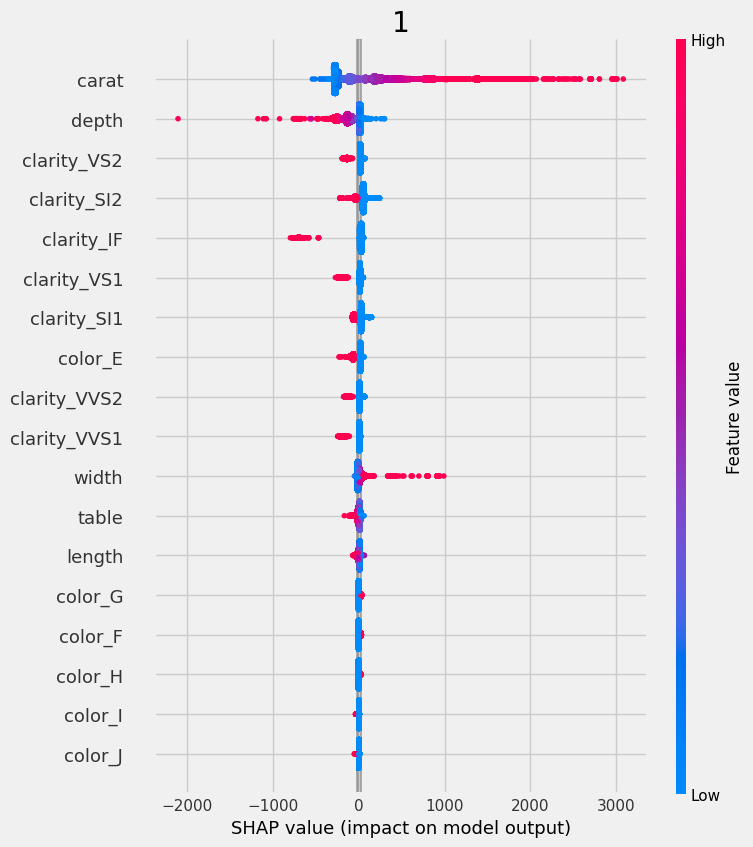

In [160]:
learner_x.plot_shap_values(X=X, tau=learner_x_tau, features=X.columns)

# Overall Conclusion

**Causal Effect Estimation Across Models**

Using three different causal inference methods—S-learner, T-learner, and X-learner—we estimated the causal effect of having an "Ideal" cut on the price of diamonds. Each method offers unique approaches to estimate the Average Treatment Effect (ATE), and the results provide a consistent understanding of the treatment's impact.

## Key Results

*`S-Learner:`*

ATE Estimate: $161.607

Confidence Interval: [125.400, 197.814]

Interpretation: The S-learner estimates that having an "Ideal" cut increases the price of a diamond by approximately 161 USD. The confidence interval suggests the estimate is statistically reliable.


*`T-Learner:`*

ATE Estimate: $213.5

Confidence Interval: [205.29, 221.83]

Interpretation: According to the T-learner model, having an "Ideal" cut increases the price of a diamond by approximately 213.5 USD. The results are consistent with the S-learner model.

*`X-Learner:`*

ATE Estimate: $183.24

Confidence Interval: [175.7, 190.7]

Interpretation: The X-learner model estimates a slightly different treatment effect, with an increase in price of 183.24 USD. The confidence interval overlaps with the S and T-learner results, indicating alignment.


## **Comparison Across Models**

All three models estimate a positive causal effect of having an "Ideal" cut on the price of diamonds, indicating that the treatment significantly impacts the outcome.

The X-learner produced slightly higher estimates of the treatment effect, likely due to its tailored handling of heterogeneous effects.

Confidence intervals for all methods overlap, indicating that the models are consistent and robust in their estimation.

## **Robustness Analysis**

S-Learner: Demonstrates general robustness but may oversimplify by fitting a single model to estimate outcomes.

T-Learner: Offers flexibility by modeling treatment groups separately but may suffer from small-sample biases in subgroups.

X-Learner: Leverages the strengths of the other two learners and is particularly useful for heterogeneous treatment effects, providing robust and detailed insights.

## **Final Conclusion**

From the collective analysis using S, T, and X-learners, we can conclude that having an "Ideal" cut significantly increases the price of diamonds. The estimated increase differs across all models. However, the confidence intervals across all models suggest the results are statistically significant and robust to modeling choices. The findings highlight the strong causal relationship between "Ideal" cuts and diamond prices.

Also, the heterogeneous effect analysis across carat categories revealed that the impact of having an 'Ideal' cut on diamond price increases significantly with carat size, with larger diamonds benefiting more from the treatment effect.



# Dowhy analysis

In [172]:
# Import necessary libraries
from dowhy import CausalModel
import dowhy.datasets
import pandas as pd

In [173]:
# Define treatment, outcome, and common causes
treatment = 'is_ideal_cut'  # Treatment variable
outcome = 'price'  # Outcome variable
common_causes = ['carat', 'depth', 'table', 'length', 'width']  # Common cause variables

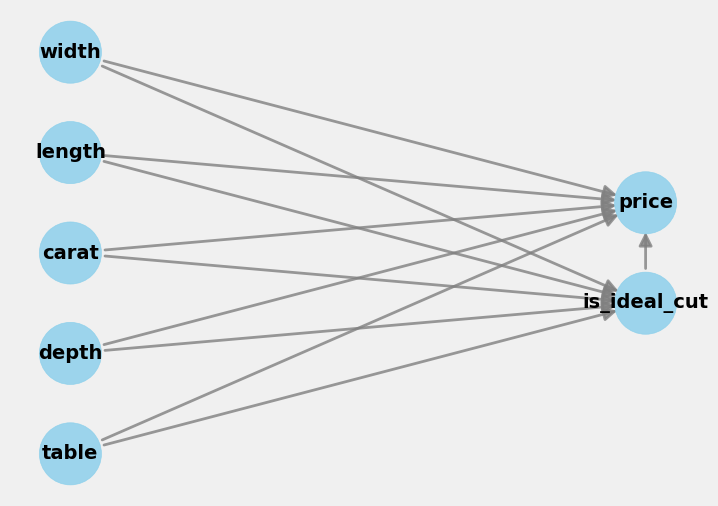

In [174]:
# Step 2: Create the DoWhy causal model
model = CausalModel(
    data=diamonds,
    treatment=treatment,
    outcome=outcome,
    common_causes=common_causes
)
# Step 3: View the model graph
model.view_model()

### Idenitifying the casual effect

In [175]:
# Step 4: Identify the causal effect
identified_estimand = model.identify_effect()
print("Identified Estimand: ", identified_estimand)

Identified Estimand:  Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                
───────────────(E[price|table,carat,length,depth,width])
d[is_ideal_cut]                                         
Estimand assumption 1, Unconfoundedness: If U→{is_ideal_cut} and U→price then P(price|is_ideal_cut,table,carat,length,depth,width,U) = P(price|is_ideal_cut,table,carat,length,depth,width)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



### Estimate the causal effect

In [176]:
# Step 5: Estimate the causal effect
causal_estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)
print("Causal Estimate: ", causal_estimate)

Causal Estimate:  *** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
       d                                                
───────────────(E[price|table,carat,length,depth,width])
d[is_ideal_cut]                                         
Estimand assumption 1, Unconfoundedness: If U→{is_ideal_cut} and U→price then P(price|is_ideal_cut,table,carat,length,depth,width,U) = P(price|is_ideal_cut,table,carat,length,depth,width)

## Realized estimand
b: price~is_ideal_cut+table+carat+length+depth+width
Target units: ate

## Estimate
Mean value: 363.08547720309343



### Refute the estimate

In [177]:
# Step 6: Refute the estimate
refutation = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="placebo_treatment_refuter"
)
print("Refutation using Placebo Treatment: ", refutation)

Refutation using Placebo Treatment:  Refute: Use a Placebo Treatment
Estimated effect:363.08547720309343
New effect:-0.5893517812920663
p value:0.94



### Adding a bootstrap estimate

In [178]:
refutation_results_bootstrap = model.refute_estimate(
    identified_estimand,
    causal_estimate,
    method_name="bootstrap_refuter",
    show_progress_bar=True,
)

print(refutation_results_bootstrap)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Bootstrap Sample Dataset
Estimated effect:363.08547720309343
New effect:344.48924218797663
p value:0.34



## Causal Effect Estimation

The causal effect of having an "Ideal" cut on the price of diamonds has been quantified using linear regression. Since the treatment variable is binary, the calculated effect is the Average Treatment Effect (ATE).

**Interpretation**

The estimated effect value: The analysis shows that having an "Ideal" cut increases the diamond price by approximately $363.09, on average.

**Robustness Test (Placebo Treatment):**

A placebo treatment test showed an estimated effect of $0.58 with a high p-value of 0.94, indicating that the observed effect is likely due to the treatment and not due to random chance.

**Robustness Test (Bootstrap Analysis):**

Bootstrapping revealed an estimated effect of $344.48 with a p-value of 0.34, further supporting the robustness of the result.


**Conclusion**

The above estimates and robustness tests suggest that the causal effect of having an "Ideal" cut on the price of diamonds is statistically significant and robust to different validation methods. Therefore, we conclude that having an "Ideal" cut increases the diamond price by approximately $363.09, on average.
